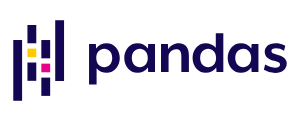





From the Pandas docs:
    
    pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real-world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis/manipulation tool available in any language. It is already well on its way toward this goal.

# Practical example: Dunstaffnage weather record

We are going to look at some data from a weather station here at Dunstaffnage. 

We can quite easily use inbuilt functions to read the data:

In [1]:
f = open('data/dunstaffnagedata.txt', 'r').readlines()[0:10]
f

['Dunstaffnage\n',
 'Location 188100E 734000N, Lat 56.451 Lon -5.439, 3m amsl\n',
 'Estimated data is marked with a * after the value.\n',
 'Missing data (more than 2 days missing in month) is marked by  ---.\n',
 'Sunshine data taken from an automatic Kipp & Zonen sensor marked with a #, otherwise sunshine data taken from a Campbell Stokes recorder.\n',
 '   yyyy  mm   tmax    tmin      af    rain     sun\n',
 '              degC    degC    days      mm   hours\n',
 '   1971   6   ---     ---     ---     71.4    ---\n',
 '   1971   7   ---     ---     ---     50.1    ---\n',
 '   1971   8   ---     ---     ---     83.0    ---\n']

But we can't do very much analysis in this format. We can use the [Pandas](https://pandas.pydata.org/docs/index.html) module to do this.  Pandas is a powerful tool for working with tabular data, such as data stored in spreadsheets or databases. Pandas contains many inbuilt data structures to help you to explore, clean, and process your data. In pandas, a data table is called a DataFrame.

We can import any module (in our environment) using the following code

In [2]:
import pandas as pd

#### Read data file to data frame

In [5]:
# set new column names
col_names = ["Year", "Month", "tmax", "tmin","af","rain","sunhours","recorder"]

df = pd.read_csv('data/dunstaffnagedata.txt',
                 skiprows=7,
                 names=col_names,
                 sep='\s+',
                 na_values='---',\
                 index_col='time',
                 parse_dates={'time':['Year','Month']})

C:\Users\sa01ld\AppData\Local\Temp\ipykernel_25148\125378153.py:4: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv('data/dunstaffnagedata.txt',
C:\Users\sa01ld\AppData\Local\Temp\ipykernel_25148\125378153.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('data/dunstaffnagedata.txt',


#### Print first 5 lines of dataset

In [6]:
df.head() 

,tmax,tmin,af,rain,sunhours,recorder
time,,,,,,
1971-06-01,NaN,NaN,NaN,71.4,NaN,NaN
1971-07-01,NaN,NaN,NaN,50.1,NaN,NaN
1971-08-01,NaN,NaN,NaN,83.0,NaN,NaN
1971-09-01,NaN,NaN,NaN,75.3,NaN,NaN
1971-10-01,NaN,NaN,NaN,270.7,NaN,NaN


#### Print last 5 lines of dataset

In [7]:
df.tail() 

,tmax,tmin,af,rain,sunhours,recorder
time,,,,,,
2023-09-01,18.2,11.3,0.0,215.2,NaN,Provisional
2023-10-01,13.3,8.5,0.0,220.4,NaN,Provisional
2023-11-01,9.5,4.3,6.0,98.6,NaN,Provisional
2023-12-01,8.6,3.6,7.0,214.6,NaN,Provisional
2024-01-01,7.6,1.5,11.0,178.8,NaN,Provisional


#### Print data single timestep

We can do this by indexing the time column, which we designateed as an index when we read the data in:

    index_col='time'
    
The orginal data had two date-like columns **year** and **month**. We use a Pandas in-built parser to convert this to datetime data. 

    parse_dates={'time':['Year','Month']}
    
**Note:** The high level functions of each module such as `read_csv` in Pandas have very clear documentaion and exmaples. See [here](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

In [8]:
df.loc['2022-10-01'] 

tmax         14.3
tmin          9.6
af            0.0
rain        240.4
sunhours      NaN
recorder      NaN
Name: 2022-10-01 00:00:00, dtype: object

#### Show data for single variable

In [9]:
df.rain

time
1971-06-01     71.4
1971-07-01     50.1
1971-08-01     83.0
1971-09-01     75.3
1971-10-01    270.7
              ...  
2023-09-01    215.2
2023-10-01    220.4
2023-11-01     98.6
2023-12-01    214.6
2024-01-01    178.8
Name: rain, Length: 632, dtype: float64

#### Quick plot

Pandas has lots of inbuilt functionality for plotting variables from the dataframe. For example, we can run some of these in the code block below.We can use pandas to quickly plot all the variables in the dataframe to get an overview of the data.

array([[<Axes: xlabel='time'>, <Axes: xlabel='time'>,
        <Axes: xlabel='time'>, <Axes: xlabel='time'>],
       [<Axes: xlabel='time'>, <Axes: xlabel='time'>,
        <Axes: xlabel='time'>, <Axes: xlabel='time'>]], dtype=object)

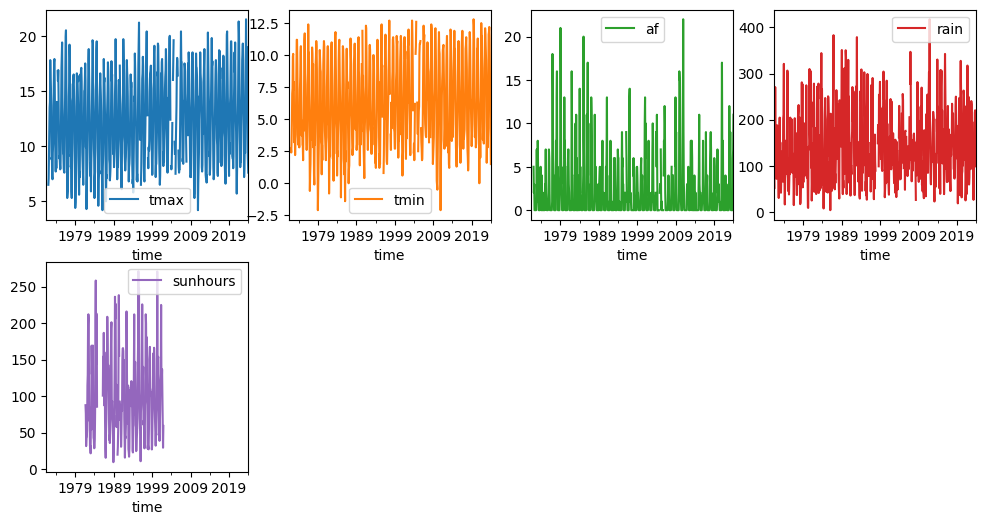

In [10]:
df.plot(subplots=True, layout=(2, 4), figsize=(12, 6), sharex=False)

#### Plot single variable

<Axes: xlabel='time', ylabel='Rain (mm)'>

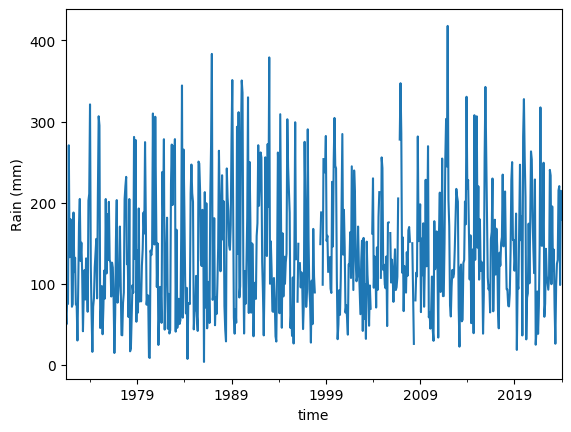

In [11]:
df.rain.plot(ylabel="Rain (mm)")

#### Plot multiple variables

<Axes: xlabel='time', ylabel='Temperature [degC]'>

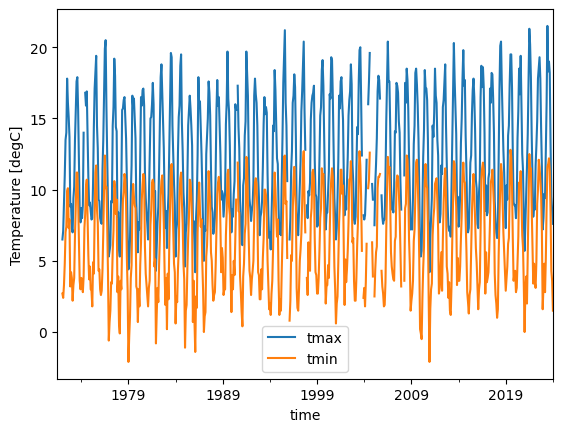

In [12]:
columns = ["tmax", "tmin"]
df[columns].plot(ylabel="Temperature [degC]")


In [13]:
df.rain

time
1971-06-01     71.4
1971-07-01     50.1
1971-08-01     83.0
1971-09-01     75.3
1971-10-01    270.7
              ...  
2023-09-01    215.2
2023-10-01    220.4
2023-11-01     98.6
2023-12-01    214.6
2024-01-01    178.8
Name: rain, Length: 632, dtype: float64

#### Plot subset of years

<Axes: xlabel='time', ylabel='Temperature [degC]'>

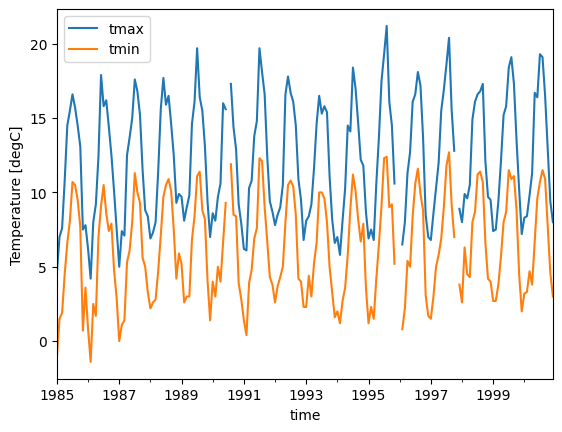

In [14]:
df[columns]['1985':'2000'].plot(ylabel="Temperature [degC]")

That was pretty simple, and we are only using Pandas, but if we want to make any nicer plots, we will have to use Matplotlib. We wil also import numpy as we will want to use someof its fucntions as well.

#### Sub-set high precipitation months

In [17]:
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, 'Precipitation [mm/month]')

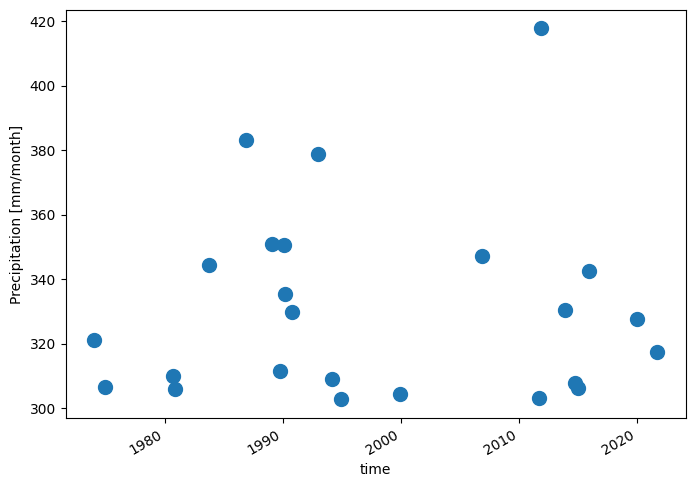

In [18]:
plt.figure(figsize=(8,6))
df[df.rain>300].rain.plot(style='o',ms=10)
plt.ylabel('Precipitation [mm/month]')

#### Create a monthly precipitation climatology

First we take an index of the months. 

In [19]:
IMonth=df.index.month
rain_mm = df.groupby(IMonth)['rain'].mean() 

You can type `Imonth` or `print(IMonth)`. If you want to see the results

Text(0.5, 1.0, 'Cumulative monthly precipitation climatology: 1971-2024')

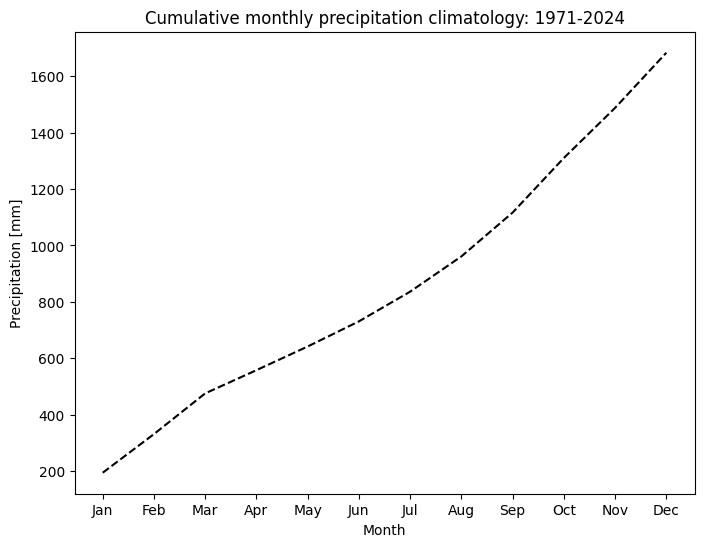

In [20]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(rain_mm.cumsum(),'k--')
ax.set_ylabel('Precipitation [mm]')
ax.set_xlabel('Month')
ticklabels = df.loc['2000'].index.strftime('%b')
ax.set_xticks(np.arange(1,13))
ax.set_xticklabels(ticklabels) # add monthlabels to the xaxis
ax.set_title('Cumulative monthly precipitation climatology: {}-{}'.format(df.index.year[0],df.index.year[-1]))

Now lets do some data processing and analysis.

Below we will average the existing tmax and tmin variables to give an estimate of the monthly average temperature (***Disclaimer:*** this probably isn't a very good estimate for average monthly temperature!). We will then interpolate missing values and apply a 12 month moving average before plotting. Finally, we will plot the monthly temperature climatology over the whole record.

In [21]:
# Average tmax and tmin columns to give monthly average temperature (tavg)
columns = ["tmax", "tmin"]
df['tavg'] = df[columns].mean(axis=1)

#### Plot 12-month rolling averaged min, max and average temperatures

Text(0.5, 1.0, '12-month rolling averaged temperatures')

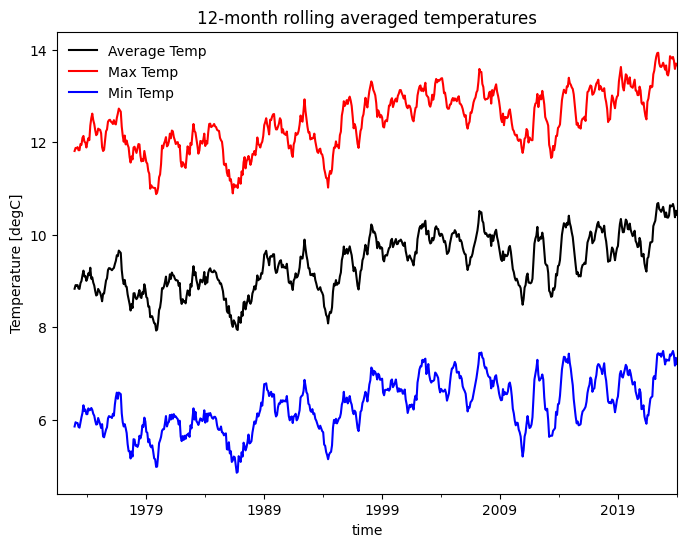

In [22]:
# set figure dimensions
plt.figure(figsize=(8,6))

# apply statistcs 
df['tavg'].interpolate().rolling(window=12).mean().plot(color='k')
df['tmax'].interpolate().rolling(window=12).mean().plot(color='r')
df['tmin'].interpolate().rolling(window=12).mean().plot(color='b')

# add a legend
plt.legend(['Average Temp','Max Temp','Min Temp'],frameon=False,loc='best')

# add a y-label
plt.ylabel('Temperature [degC]')

# add a title
plt.title('12-month rolling averaged temperatures')

#### Average by month to produce monthly climatology

[Text(1, 0, 'Jan'),
 Text(2, 0, 'Feb'),
 Text(3, 0, 'Mar'),
 Text(4, 0, 'Apr'),
 Text(5, 0, 'May'),
 Text(6, 0, 'Jun'),
 Text(7, 0, 'Jul'),
 Text(8, 0, 'Aug'),
 Text(9, 0, 'Sep'),
 Text(10, 0, 'Oct'),
 Text(11, 0, 'Nov'),
 Text(12, 0, 'Dec')]

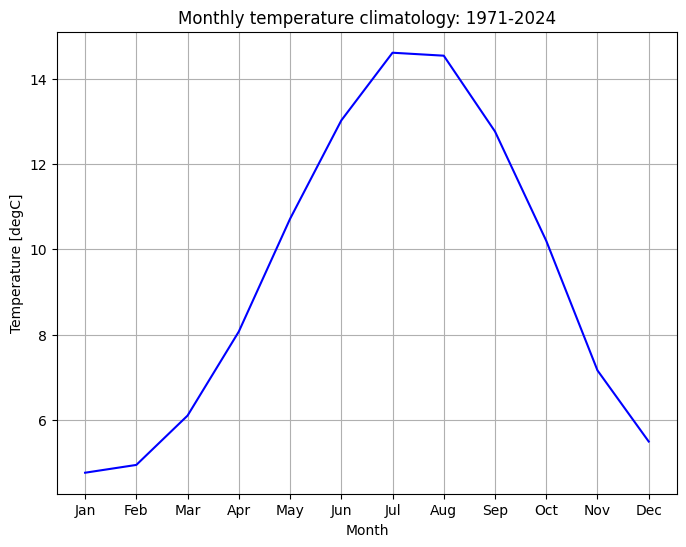

In [23]:
tavg_mm=df.groupby(df.index.month)['tavg'].mean()

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(tavg_mm,'b')
ax.set_ylabel('Temperature [degC]')
ax.set_xlabel('Month')

# add a grid 
plt.grid()

# set title 
ax.set_title('Monthly temperature climatology: {}-{}'.format(df.index.year[0],df.index.year[-1]))

# set tick labels
ticklabels = df.loc['2000'].index.strftime('%b') # add month xtick labels
ax.set_xticks(np.arange(1,13))
ax.set_xticklabels(ticklabels) #add monthlabels to the xaxis

# Linear Regression

Now for some statistics. Here we apply a linear regression on time and average temperature to calculate the warming trend at Dunstaffnage during the record.

##### Interpolate missing values, apply 12 month moving average and remove NaN's

In [26]:
tavg=df['tavg'].interpolate().rolling(window=12).mean().dropna()

Compute days since the first date in the index and convert this to decades for the time variable

In [27]:
delta = (tavg.index - tavg.index[0])
days = delta.days
decades = days/365/10 # convert to decades so we get the slope estimate in temperature change per decade

x = decades
y = tavg.values

#### The regression

We'll need `stats` from the SciPy module for this.

In [28]:
from scipy import stats

To get help on a function you can type it's name followed by '?' to print the functions docstring. 
Adding '??' to the end of the function name will print the raw python code so you can look in detail what the function is doing 'under the hood'

    stats.linregress??

slope: 0.275277, intercept: 8.673423
R-squared: 0.461982


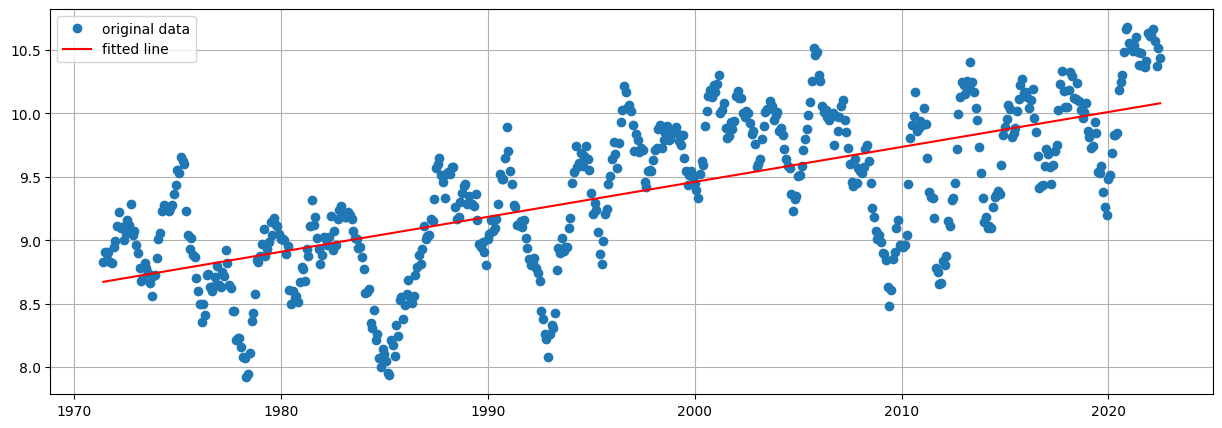

Temperature trend at Dunstaffnage is 0.28 degrees per decade


In [29]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f, intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)

# Plot the data with a trend line
plt.figure(figsize=(15, 5))
plt.plot(df.index[0]+delta, y, 'o', label='original data')
plt.plot(df.index[0]+delta, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.grid()
plt.show()

# print the regression after the figure
print('Temperature trend at Dunstaffnage is {} degrees per decade'.format(round(slope,2)))

As an example of signal processing using SciPy, we will calculate the discrete Fourier transform on our average temperature data using the SciPy FFTpack module.

Text(0, 0.5, 'PSD (dB)')

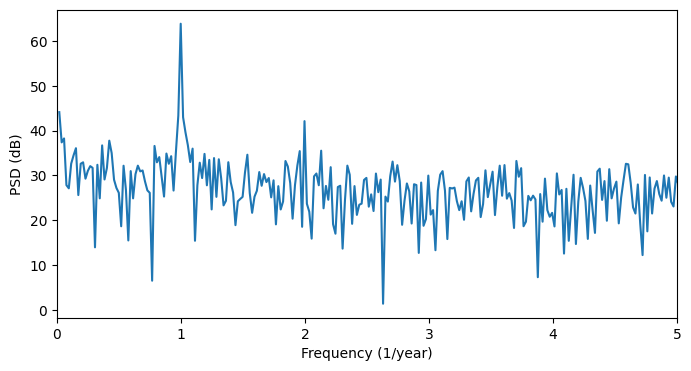

In [30]:
import scipy as sp
import scipy.fftpack
import datetime

# first clean the data by interpolating missing points and removing any remaining NaN's
data = df['tavg'].interpolate().dropna() 

#print(data.values) # sometimes need to extract data from a structure using .values
#print(data)

temp_fft = sp.fftpack.fft(data.values) # Return discrete Fourier transform

temp_psd = np.abs(temp_fft) ** 2

fftfreq = sp.fftpack.fftfreq(len(temp_psd), 1. / 12) # sample frequencies for monthly data

i = fftfreq > 0

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(fftfreq[i], 10 * np.log10(temp_psd[i]))
ax.set_xlim(0, 5)
ax.set_xlabel('Frequency (1/year)')
ax.set_ylabel('PSD (dB)')

Because the fundamental frequency of the signal is the yearly variation of the temperature (the seasonal cycle), we observe a clear peak at f=1 cycle/year. 

We can cut out frequencies higher than the fundamental frequency and perform an inverse FFT to convert the modified Fourier transform back to the temporal domain. This way, we recover a smoothed version of the signal (because the fast variations have been lost when we removed the high frequencies in the Fourier transform) that mainly contains the fundamental frequency, as shown in the following figure:

Text(0, 0.5, 'Mean temperature')

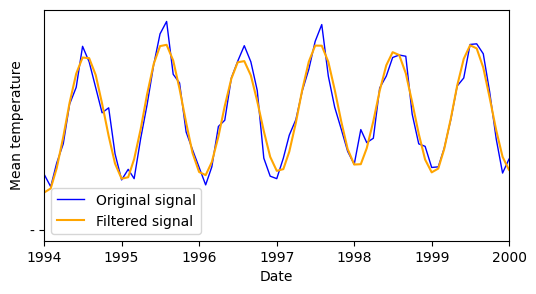

In [31]:
temp_fft_bis = temp_fft.copy()
temp_fft_bis[np.abs(fftfreq) > 1.1] = 0

temp_slow = np.real(sp.fftpack.ifft(temp_fft_bis))

fig, ax = plt.subplots(figsize=(6, 3))
#data.plot(ax=ax,color='b',lw=1.0, label='Original signal')
ax.plot(data, color='b', linewidth=1.0)
ax.plot(data.index,temp_slow, 'Orange', '-')
ax.set_xlim(datetime.date(1994, 1, 1),datetime.date(2000, 1, 1))
ax.legend(['Original signal','Filtered signal'])
ax.set_xlabel('Date')
ax.set_ylabel('Mean temperature')
#plt.show()

# Correlation

Lets finish by calculating some comparison statistics from the dataset. We will first plot the correlation matrix across all variables in the dataframe using Pandas inbuilt pairwise correlation of columns function. This exploratory data analysis will inform how we then progress with analysing the data in detail.

In [32]:
# Print correlation matrix across all variables in dataframe

print('Correlation matrix: \n{}'.format(df.corr))

Correlation matrix: 
<bound method DataFrame.corr of             tmax  tmin    af   rain  sunhours     recorder   tavg
time                                                             
1971-06-01   NaN   NaN   NaN   71.4       NaN          NaN    NaN
1971-07-01   NaN   NaN   NaN   50.1       NaN          NaN    NaN
1971-08-01   NaN   NaN   NaN   83.0       NaN          NaN    NaN
1971-09-01   NaN   NaN   NaN   75.3       NaN          NaN    NaN
1971-10-01   NaN   NaN   NaN  270.7       NaN          NaN    NaN
...          ...   ...   ...    ...       ...          ...    ...
2023-09-01  18.2  11.3   0.0  215.2       NaN  Provisional  14.75
2023-10-01  13.3   8.5   0.0  220.4       NaN  Provisional  10.90
2023-11-01   9.5   4.3   6.0   98.6       NaN  Provisional   6.90
2023-12-01   8.6   3.6   7.0  214.6       NaN  Provisional   6.10
2024-01-01   7.6   1.5  11.0  178.8       NaN  Provisional   4.55

[632 rows x 7 columns]>


We see that there is a relativly strong negative correlation of -0.64 between sunlight hours and rainfall (as you might expect!). 

We can dig into this relationship a little deeper using NumPy and SciPy to calculate the comparison statistics and fit a linear regression to compare the observed monthly sunlight hours with the monthly rainfall total for the decade 1987-1997.

#### Extract and clean sunhours and rain between 1987 and 1997

Text(0, 0.5, 'Precipitation [mm/month]')

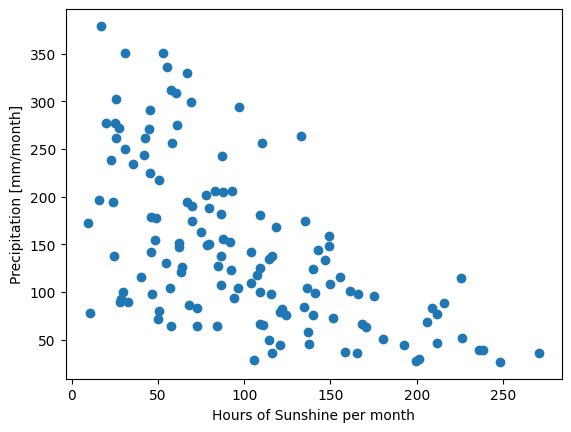

In [33]:
columns=['sunhours','rain']
data=df[columns]['1987':'1997'].interpolate().dropna() 

plt.scatter(data['sunhours'].values,data['rain'].values)
plt.xlabel('Hours of Sunshine per month')
plt.ylabel('Precipitation [mm/month]')

#### Compare the correlations calculated by NumPy and SciPy methods

In [34]:
# get raw data arrays
x = data['sunhours'].values
y = data['rain'].values 

r = np.corrcoef(x, y) # NumPy correlation coefficient
print('NumPy Corelation coefficient = {}'.format(r[0, 1]))

r = stats.pearsonr(x, y) # SciPy Pearson correlation coefficient and p-value. See 'stats.pearsonr?' for more detail
print('SciPy Pearson R = {}'.format(r[0])) 

NumPy Corelation coefficient = -0.5919802889462309
SciPy Pearson R = -0.5919802889462309


#### Print linear regression results

In [35]:
result = stats.linregress(x, y)
print('Regression slope = {}'.format(result.slope))
print('Regression intercept = {}'.format(result.intercept))
print('Regression pvalue = {}'.format(result.pvalue))
print('Regression standard error = {}'.format(result.stderr))
print('Regression R^2 = {}'.format(result.rvalue**2))

Regression slope = -0.8466232030651243
Regression intercept = 229.69682131580072
Regression pvalue = 7.693942016786062e-14
Regression standard error = 0.10109290100799274
Regression R^2 = 0.35044066250086287


From this comparison it seems reasonable to assume that months with more sunlight hours will have less rainfall; looking at the R^2 value, 35% of the variance in rainfall can be explained by variability in sunlight. We will now take this a little further and see if we can predict rainfall from sunlight hours by fitting a linear regression model from the scikit-learn module.

# Scikit-learn

Scikit-learn (or sklearn) is a powerful module designed for machine learning in Python. Sklearn is built on NumPy, SciPy, and matplotlib and provides simple and efficient tools for predictive data analysis. Below we will fit a linear model to the data (similar to what we did above using SciPy) but then use it to make predictions.

In [36]:
from sklearn.linear_model import LinearRegression

X = x[:, np.newaxis] # Use only one feature

reg = LinearRegression().fit(X, y) # Sanity check: The values below should look very similar to the values calculated using the SciPy stats.linregress method above.
print('Regression R^2 = {}'.format(reg.score(X, y)))
print('Regression slope: {}'.format(reg.coef_[0]))
print('Regression intercept: {}'.format(reg.intercept_))

Regression R^2 = 0.35044066250086303
Regression slope: -0.8466232030651245
Regression intercept: 229.69682131580075


Notice that the slope and intercept are nearly identical to the values calculated using the SciPy method (good news!). We can now divide the data into a training and test set and use scikit-learn to fit a linear model to the training set and use the test set to assess the accuracy of the predictions (and, finally, make a prediction of monthly precipitation from sunlight hours).

#### Write a predictive regression model 

In [37]:
from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score

X = x[:, np.newaxis] # Use only one feature

#### Splitting the datasets into training and testing sets (you could do this manually, i.e. X_train = X[:-20])

TypeError: got an unexpected keyword argument 'squared'

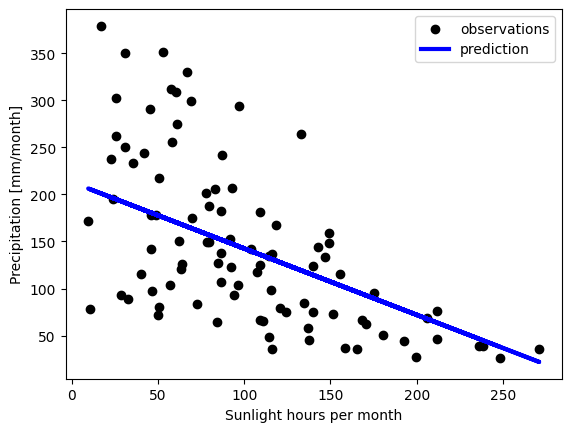

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)

# Create linear regression object
model = LinearRegression()

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Plot outputs
plt.scatter(X_test, y_test, color="black", label='observations')
plt.plot(X_test, y_pred, color="blue", linewidth=3, label='prediction')
plt.xlabel('Sunlight hours per month')
plt.ylabel('Precipitation [mm/month]')
plt.legend()
#plt.show()

# Running Evaluation Metrics
from sklearn.metrics import mean_squared_error, r2_score
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

print('The r^2 is: ', r2)
print('The RMSE is: ', rmse)

#### Make a prediction

In [ ]:
monthly_sunhours = 100
prediction = model.predict(np.array([[monthly_sunhours]]))[0]
print('For a month with {} hours of sunlight, I would predict there to be {} mm of rain'.format(int(monthly_sunhours),np.round(prediction,2)))